In [2]:
#Import the necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## DATA AQUISITION ##
# Load the different SuperBowl and related CSV data into DataFrames.
super_bowl = pd.read_csv("super_bowls.csv")
tv_df = pd.read_csv("tv.csv")
hf_music = pd.read_csv("halftime_musicians.csv")

#Display each dataset to get an idea of the data.
super_bowl.head()

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
1,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6
2,2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14
3,2015-02-01,49,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35


In [3]:
tv_df.head()

,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost
0,52,NBC,103390000,NaN,43.1,68,33.4,78.0,5000000
1,51,Fox,111319000,172000000.0,45.3,73,37.1,79.0,5000000
2,50,CBS,111864000,167000000.0,46.6,72,37.7,79.0,5000000
3,49,NBC,114442000,168000000.0,47.5,71,39.1,79.0,4500000
4,48,Fox,112191000,167000000.0,46.7,69,39.3,77.0,4000000


In [4]:
hf_music.head()

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0


In [5]:
#Check each dataset for missing values and range.

super_bowl.info()
#The SuperBowl dataset seems to be missing only the backup Quarterback column (since only one Quarterback usually plays the entire game).

print('\n')
tv_df.info()
print('\n')
hf_music.info()

#The TV Ratings and Musicians dataset has a few null values but that is expected since the dataset starts from 1967.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 18 columns):
date              52 non-null object
super_bowl        52 non-null int64
venue             52 non-null object
city              52 non-null object
state             52 non-null object
attendance        52 non-null int64
team_winner       52 non-null object
winning_pts       52 non-null int64
qb_winner_1       52 non-null object
qb_winner_2       2 non-null object
coach_winner      52 non-null object
team_loser        52 non-null object
losing_pts        52 non-null int64
qb_loser_1        52 non-null object
qb_loser_2        3 non-null object
coach_loser       52 non-null object
combined_pts      52 non-null int64
difference_pts    52 non-null int64
dtypes: int64(6), object(12)
memory usage: 7.4+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 9 columns):
super_bowl          53 non-null int64
network             53 non-null object
avg_us_

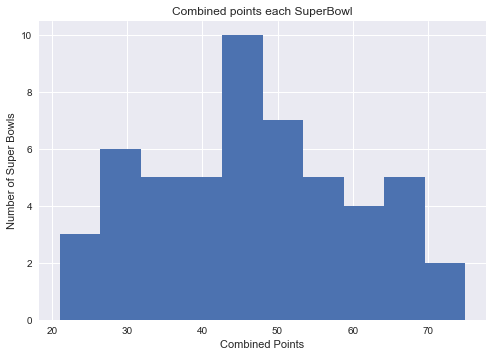

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
23,1995-01-29,29,Joe Robbie Stadium,Miami Gardens,Florida,74107,San Francisco 49ers,49,Steve Young,NaN,George Seifert,San Diego Chargers,26,Stan Humphreys,NaN,Bobby Ross,75,23


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
43,1975-01-12,9,Tulane Stadium,New Orleans,Louisiana,80997,Pittsburgh Steelers,16,Terry Bradshaw,NaN,Chuck Noll,Minnesota Vikings,6,Fran Tarkenton,NaN,Bud Grant,22,10
45,1973-01-14,7,Memorial Coliseum,Los Angeles,California,90182,Miami Dolphins,14,Bob Griese,NaN,Don Shula,Washington Redskins,7,Bill Kilmer,NaN,George Allen,21,7
49,1969-01-12,3,Orange Bowl,Miami,Florida,75389,New York Jets,16,Joe Namath,NaN,Weeb Ewbank,Baltimore Colts,7,Earl Morrall,Johnny Unitas,Don Shula,23,9


In [6]:
%matplotlib inline
plt.style.use('seaborn')

# Plot a histogram of combined points.
plt.hist(super_bowl.combined_pts)
plt.xlabel('Combined Points')
plt.ylabel('Number of Super Bowls')
plt.title('Combined points each SuperBowl')
plt.show()

# Display the Super Bowls with the highest and lowest combined scores.
display(super_bowl[super_bowl['combined_pts'] > 70])
display(super_bowl[super_bowl['combined_pts'] < 25])

#The 2018 and 1995 SuperBowls had the most combined points from each team and possibly were the most exciting ones to watch!

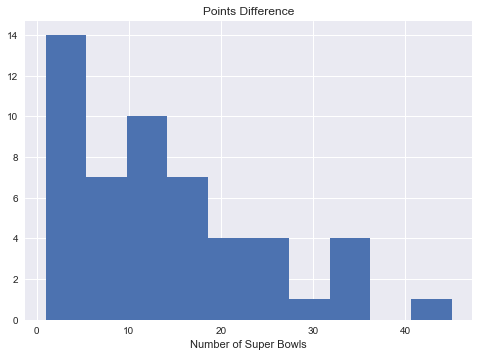

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
27,1991-01-27,25,Tampa Stadium,Tampa,Florida,73813,New York Giants,20,Jeff Hostetler,NaN,Bill Parcells,Buffalo Bills,19,Jim Kelly,NaN,Marv Levy,39,1


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35
25,1993-01-31,27,Rose Bowl,Pasadena,California,98374,Dallas Cowboys,52,Troy Aikman,NaN,Jimmy Johnson,Buffalo Bills,17,Jim Kelly,Frank Reich,Marv Levy,69,35
28,1990-01-28,24,Louisiana Superdome,New Orleans,Louisiana,72919,San Francisco 49ers,55,Joe Montana,NaN,George Seifert,Denver Broncos,10,John Elway,NaN,Dan Reeves,65,45
32,1986-01-26,20,Louisiana Superdome,New Orleans,Louisiana,73818,Chicago Bears,46,Jim McMahon,NaN,Mike Ditka,New England Patriots,10,Tony Eason,Steve Grogan,Raymond Berry,56,36


In [7]:
# Plot a histogram of point differences to find the most interesting matches.
plt.hist(super_bowl.difference_pts)
plt.xlabel('Point Difference')
plt.xlabel('Number of Super Bowls')
plt.title('Points Difference')
plt.show()

# Display the closest game(s) and biggest blowouts.
display(super_bowl[super_bowl['difference_pts'] == 1])
display(super_bowl[super_bowl['difference_pts'] >= 35])

#1991 Superbowl 25 had the least point difference whereas there are a few which have points difference greater than 35 as well.

In [8]:
#Joining the SuperBowl and TV Datasets based on SuperBowl number to find if Huge Points Difference translated to lost viewers.
#Filtering out SuperBowl 1 because it was split over two networks.
games_tv = pd.merge(tv_df[tv_df['super_bowl'] > 1], super_bowl, on='super_bowl')
games_tv.head()

,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost,date,...,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,52,NBC,103390000,NaN,43.1,68,33.4,78.0,5000000,2018-02-04,...,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
1,51,Fox,111319000,172000000.0,45.3,73,37.1,79.0,5000000,2017-02-05,...,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6
2,50,CBS,111864000,167000000.0,46.6,72,37.7,79.0,5000000,2016-02-07,...,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14
3,49,NBC,114442000,168000000.0,47.5,71,39.1,79.0,4500000,2015-02-01,...,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4
4,48,Fox,112191000,167000000.0,46.7,69,39.3,77.0,4000000,2014-02-02,...,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35


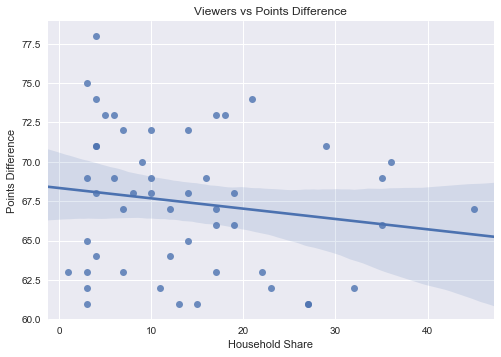

In [9]:
# Create a scatter plot with a linear regression model fit.
sns.regplot(x='difference_pts', y='share_household' , data=games_tv)
plt.ylabel('Points Difference')
plt.xlabel('Household Share')
plt.title('Viewers vs Points Difference')
plt.show()

#Huge Blowouts(Points Difference between the teams) actually does translate to a loss of viewers since the game is not as interesting!